In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plt.style.use('dark_background')

In [2]:
df = pd.read_json( 'problems MoonBoard 2016 .json' )
l = []

    l.append( row['data'] )
df = pd.DataFrame( l )

In [3]:
display( df )

,name,grade,userGrade,setbyId,setby,method,userRating,repeats,holdsetup,isBenchmark,...,upgraded,downgraded,moves,holdsets,hasBetaVideo,moonBoardConfigurationId,apiId,dateInserted,dateUpdated,dateDeleted
0,Far from the Madding Crowd,6B+,6B+,5FC09F63-05F3-4DAE-A1A5-3AC22C37139A,Ben Moon,Feet follow hands,4,28038,"{'description': 'MoonBoard 2016', 'holdsets': ...",True,...,False,False,"[{'problemId': 19215, 'description': 'E6', 'is...","[{'description': 'Hold Set B', 'locations': No...",True,0,19215,2016-03-01T10:00:27,2023-08-10T06:05:31.173,None
1,Wuthering Heights,6B+,6B+,5FC09F63-05F3-4DAE-A1A5-3AC22C37139A,Ben Moon,Feet follow hands,4,40377,"{'description': 'MoonBoard 2016', 'holdsets': ...",True,...,False,False,"[{'problemId': 19216, 'description': 'F5', 'is...","[{'description': 'Hold Set A', 'locations': No...",True,0,19216,2016-03-01T10:00:27,2023-08-10T04:12:20.487,None
2,Problem 3,6B+,6B+,CC7D7BD1-67CD-4027-A537-22E7855C18B7,Ally Patrick,Feet follow hands,4,863,"{'description': 'MoonBoard 2016', 'holdsets': ...",False,...,False,False,"[{'problemId': 19217, 'description': 'F5', 'is...","[{'description': 'Original School Holds', 'loc...",False,0,19217,2016-03-01T10:00:16,2023-08-10T00:28:05.397,None
3,HARD TIMES,7A,7A,5FC09F63-05F3-4DAE-A1A5-3AC22C37139A,Ben Moon,Feet follow hands,4,9514,"{'description': 'MoonBoard 2016', 'holdsets': ...",True,...,False,False,"[{'problemId': 19218, 'description': 'B10', 'i...","[{'description': 'Hold Set B', 'locations': No...",True,0,19218,2016-03-01T10:00:15,2023-08-10T00:33:49.533,None
4,Problem 5,7A,7A,CC7D7BD1-67CD-4027-A537-22E7855C18B7,Ally Patrick,Feet follow hands,4,275,"{'description': 'MoonBoard 2016', 'holdsets': ...",False,...,False,False,"[{'problemId': 19219, 'description': 'C5', 'is...","[{'description': 'Hold Set B', 'locations': No...",False,0,19219,2016-03-01T10:00:15,2023-08-02T17:10:57.417,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66203,Jungle Pride,6B+,6B+,4143437D-D252-4470-AD90-0437D3E11662,cory galloway,Feet follow hands,0,0,"{'description': 'MoonBoard 2016', 'holdsets': ...",False,...,False,False,"[{'problemId': 484672, 'description': 'G4', 'i...","[{'description': 'Original School Holds', 'loc...",False,0,484672,2023-08-10T04:04:57.003,2023-08-10T04:11:15.837,None
66204,Yuck!,6B+,6B+,4143437D-D252-4470-AD90-0437D3E11662,cory galloway,Feet follow hands,0,0,"{'description': 'MoonBoard 2016', 'holdsets': ...",False,...,False,False,"[{'problemId': 484674, 'description': 'A5', 'i...","[{'description': 'Original School Holds', 'loc...",False,0,484674,2023-08-10T04:26:21.793,2023-08-10T04:32:49.553,None
66205,Meep?,6B+,None,f330bfb8-3494-457e-aa89-0d7acfa3de4d,Camille Chan,Feet follow hands,0,0,"{'description': 'MoonBoard 2016', 'holdsets': ...",False,...,False,False,"[{'problemId': 484677, 'description': 'K5', 'i...","[{'description': 'Original School Holds', 'loc...",False,0,484677,2023-08-10T04:29:14.333,None,None
66206,Close to Perfect,6C,6C,4143437D-D252-4470-AD90-0437D3E11662,cory galloway,Feet follow hands,0,0,"{'description': 'MoonBoard 2016', 'holdsets': ...",False,...,False,False,"[{'problemId': 484680, 'description': 'A5', 'i...","[{'description': 'Hold Set A', 'locations': No...",False,0,484680,2023-08-10T04:40:10.707,2023-08-10T04:46:35.287,None


In [4]:
from pprint import pprint
pprint( df.iloc[0] )

name                                               Far from the Madding Crowd
grade                                                                     6B+
userGrade                                                                 6B+
setbyId                                  5FC09F63-05F3-4DAE-A1A5-3AC22C37139A
setby                                                                Ben Moon
method                                                      Feet follow hands
userRating                                                                  4
repeats                                                                 28038
holdsetup                   {'description': 'MoonBoard 2016', 'holdsets': ...
isBenchmark                                                              True
isMaster                                                                False
upgraded                                                                False
downgraded                                                      

In [5]:
print( df[df['isBenchmark'] == True]['repeats'].mean() )
print( df[df['isBenchmark'] == False]['repeats'].mean() )

4821.765137614679
14.144266938763078


In [6]:
print( len( df[df['isBenchmark'] == True] ) )
print( len( df[df['isBenchmark'] == False] ) )

545
65663


In [7]:
repeats = df['repeats'].values
counts = [ len( df ) ]

for i in range( 50 ):
    counts.append( ( repeats > i ).sum() )

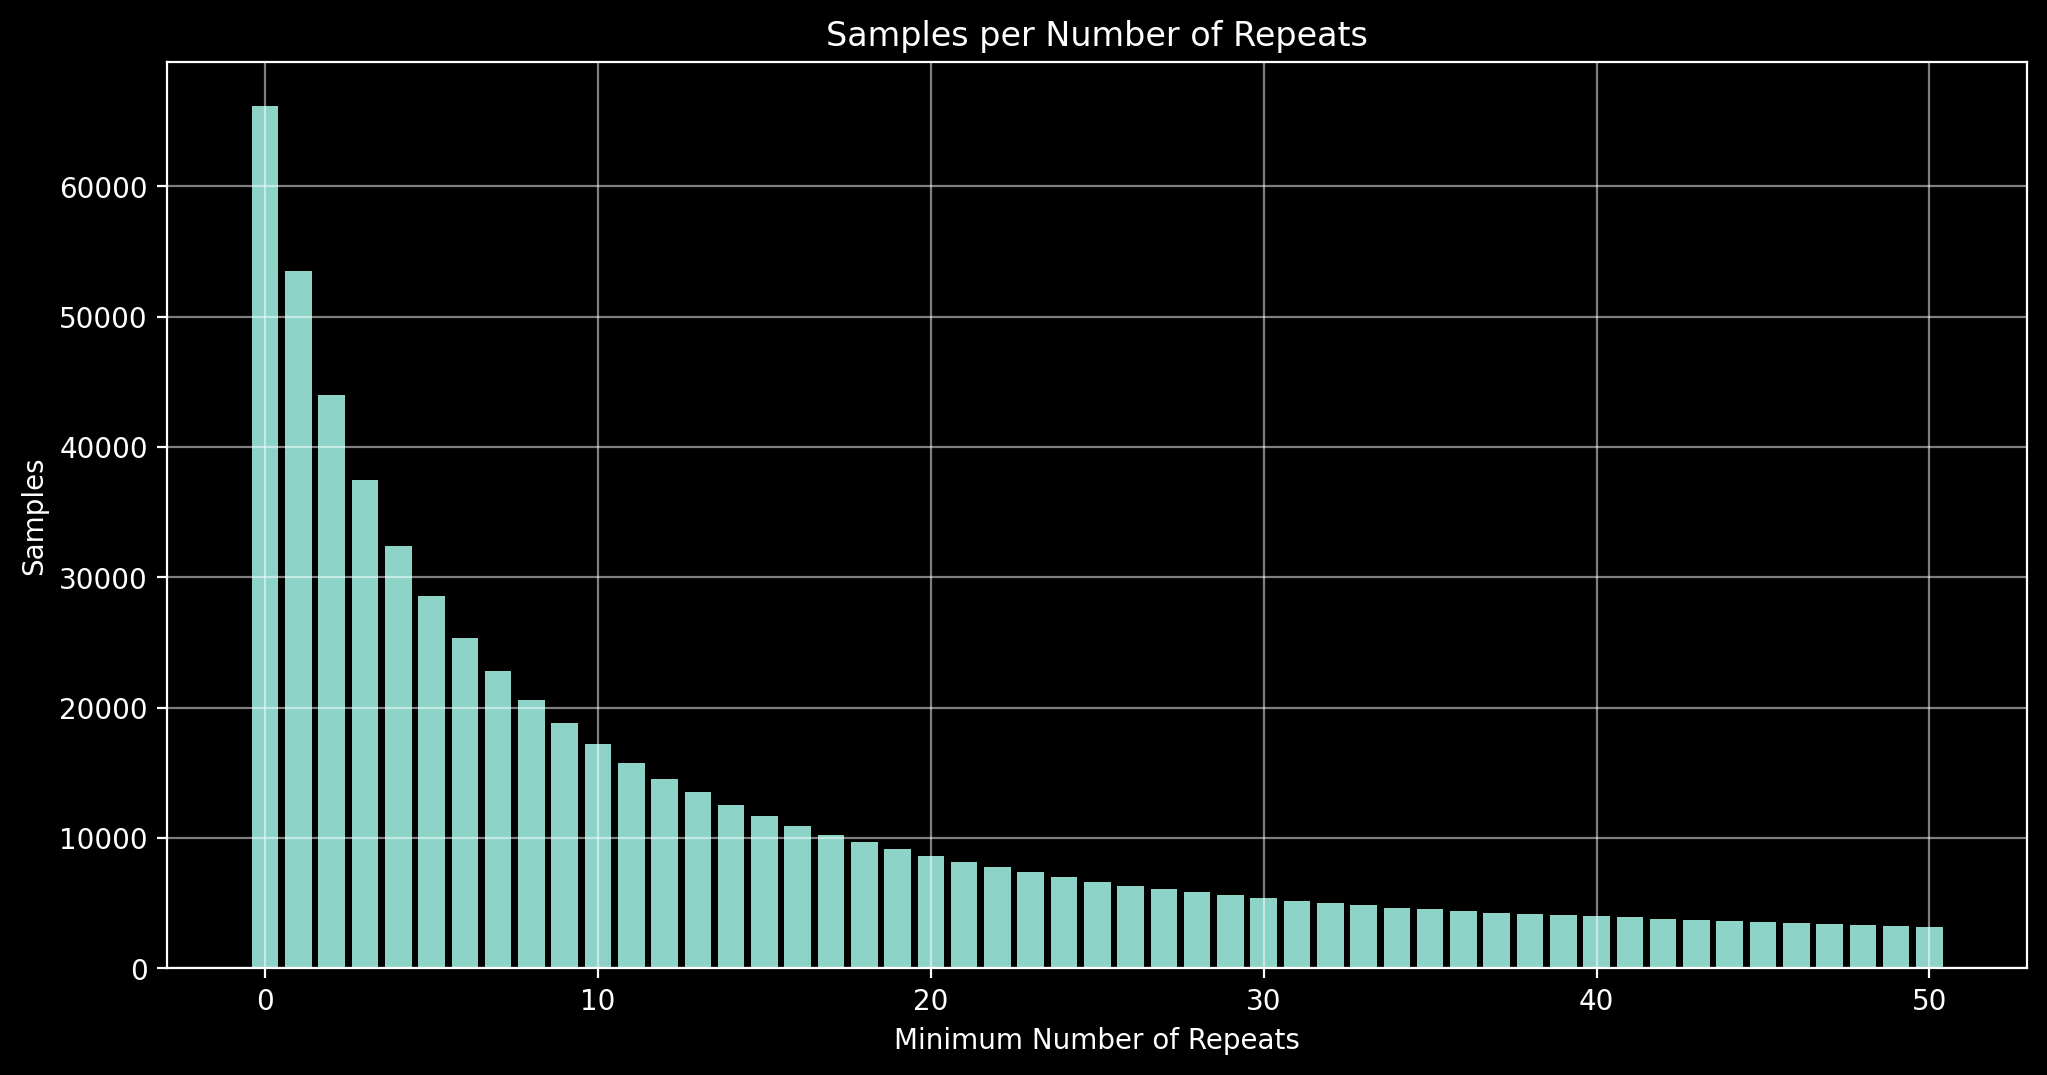

In [8]:
plt.bar( range( len( counts ) ), counts )
plt.xlabel( 'Minimum Number of Repeats' )
plt.ylabel( 'Samples' )
plt.title( 'Samples per Number of Repeats' )
plt.grid( alpha = 0.5 )

In [9]:
# Cleaning:
df = df[df['repeats'] >= 5 ]

In [11]:
grades = {
    '': -1,
    '6B': 0,
    '6B+': 1,
    '6C': 2,
    '6C+': 3,
    '7A': 4,
    '7A+': 5,
    '7B': 6,
    '7B+': 7,
    '7C': 8,
    '7C+': 9,
    '8A': 10,
    '8A+': 11,
    '8B': 12,
    '8B+': 13
}

In [12]:
df.fillna( '', inplace = True )

In [13]:
df['grade_index'] = df.apply(
    lambda x: grades[x['grade']], axis = 1
)

In [14]:
df['userGrade_index'] = df.apply(
    lambda x: grades[x['userGrade']], axis = 1
)

Text(936.0317460317461, 0.5, 'Voted Grade')

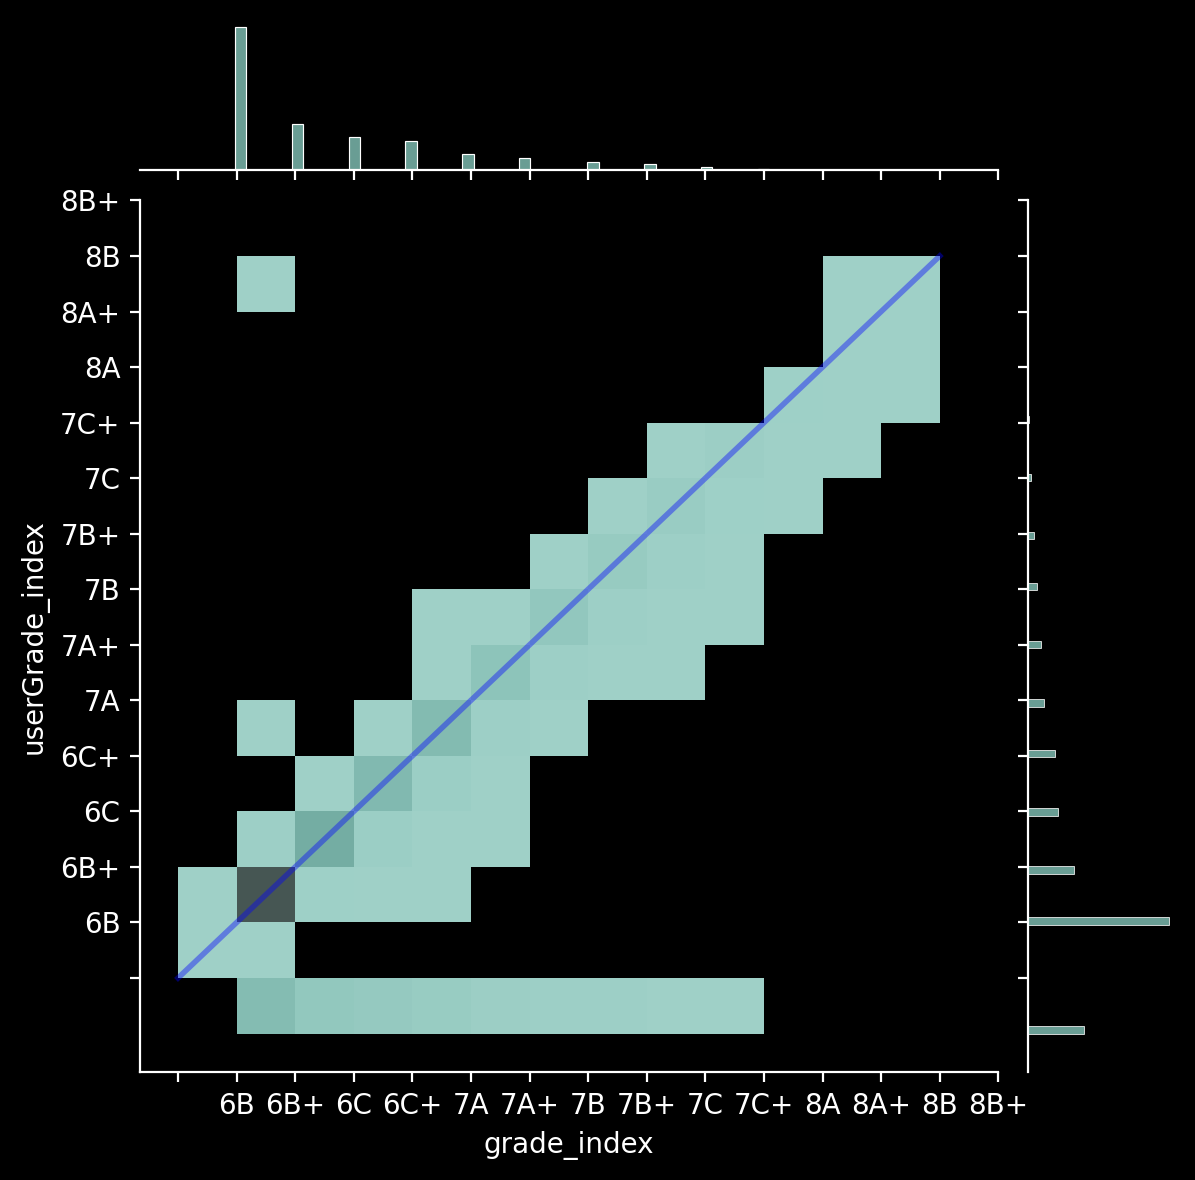

In [15]:
plot = sns.jointplot(
    data = df,
    x = 'grade_index',
    y = 'userGrade_index',
    kind = 'hist',
    binwidth = 1,
    # cmap = 'viridis'
)
plot.ax_joint.plot([0,13], [0, 13], 'b-', linewidth = 2, alpha = 0.4 )
plot.ax_joint.set_xticks( range( len( grades ) ), grades )
plot.ax_joint.set_yticks( range( len( grades ) ), grades )

plt.xlabel( 'Setter Grade' )
plt.ylabel( 'Voted Grade' )

In [16]:
grade, is_benchmark, moves = [], [], []
for i, row in df.iterrows():
    # row = row['data']
    grade.append(row['grade'])
    is_benchmark.append(row['isBenchmark'])
    moves.append( [ move['description'] for move in row['moves'] ] )

In [17]:
processed_df = pd.DataFrame(
    {'grade': grade,
     'is_benchmark': is_benchmark,
     'moves': moves
    })

In [18]:
display( processed_df )

,grade,is_benchmark,moves
0,6B+,True,"[E6, C5, E8, F11, C13, D15, D18]"
1,6B+,True,"[F5, J8, I11, K11, G13, E15, E18]"
2,6B+,False,"[F5, J5, F9, C10, G13, E15, I18]"
3,7A,True,"[B10, E6, E8, E12, E16, G4, I18, J5]"
4,7A,False,"[C5, D7, A9, F11, F13, I14, E16, D18]"
...,...,...,...
28563,6C+,False,"[F5, J2, C6, H10, K8, G13, I14, K12, E15, G18,..."
28564,6B+,False,"[G6, I6, H8, G4, E10, G13, E15, E18]"
28565,6B+,False,"[F5, E10, H8, G13, H16, E16, D18]"
28566,6B+,False,"[F5, G2, G9, C10, E12, A14, E16, B18]"


In [19]:
def moves_to_features( moves ):
    features = np.zeros( ( 18, 11 ) )
        
    for move in moves:
        features[int( move[1:] ) - 1, ord( str( move[0] ).upper() ) - 65 ] = 1
    # return np.flip( np.flip( features, axis = 0 ), axis = 1 )
    return np.flip( features, axis = 0 )

In [20]:
processed_df['features'] = processed_df.apply( 
    lambda x: moves_to_features( x['moves'] ), axis = 1
)

In [21]:
processed_df['features_flat'] = processed_df.apply( 
    lambda x: moves_to_features( x['moves'] ).flatten(), axis = 1
)

In [22]:
processed_df['grade_index'] = processed_df.apply(
    lambda x: grades[x['grade']], axis = 1
)

In [64]:
processed_df['n_holds'] = processed_df.apply(
    lambda x: len( x['moves'] ), axis = 1
)

In [ ]:
df.explode( 

In [23]:
# processed_df = processed_df[processed_df['is_benchmark'] == True]

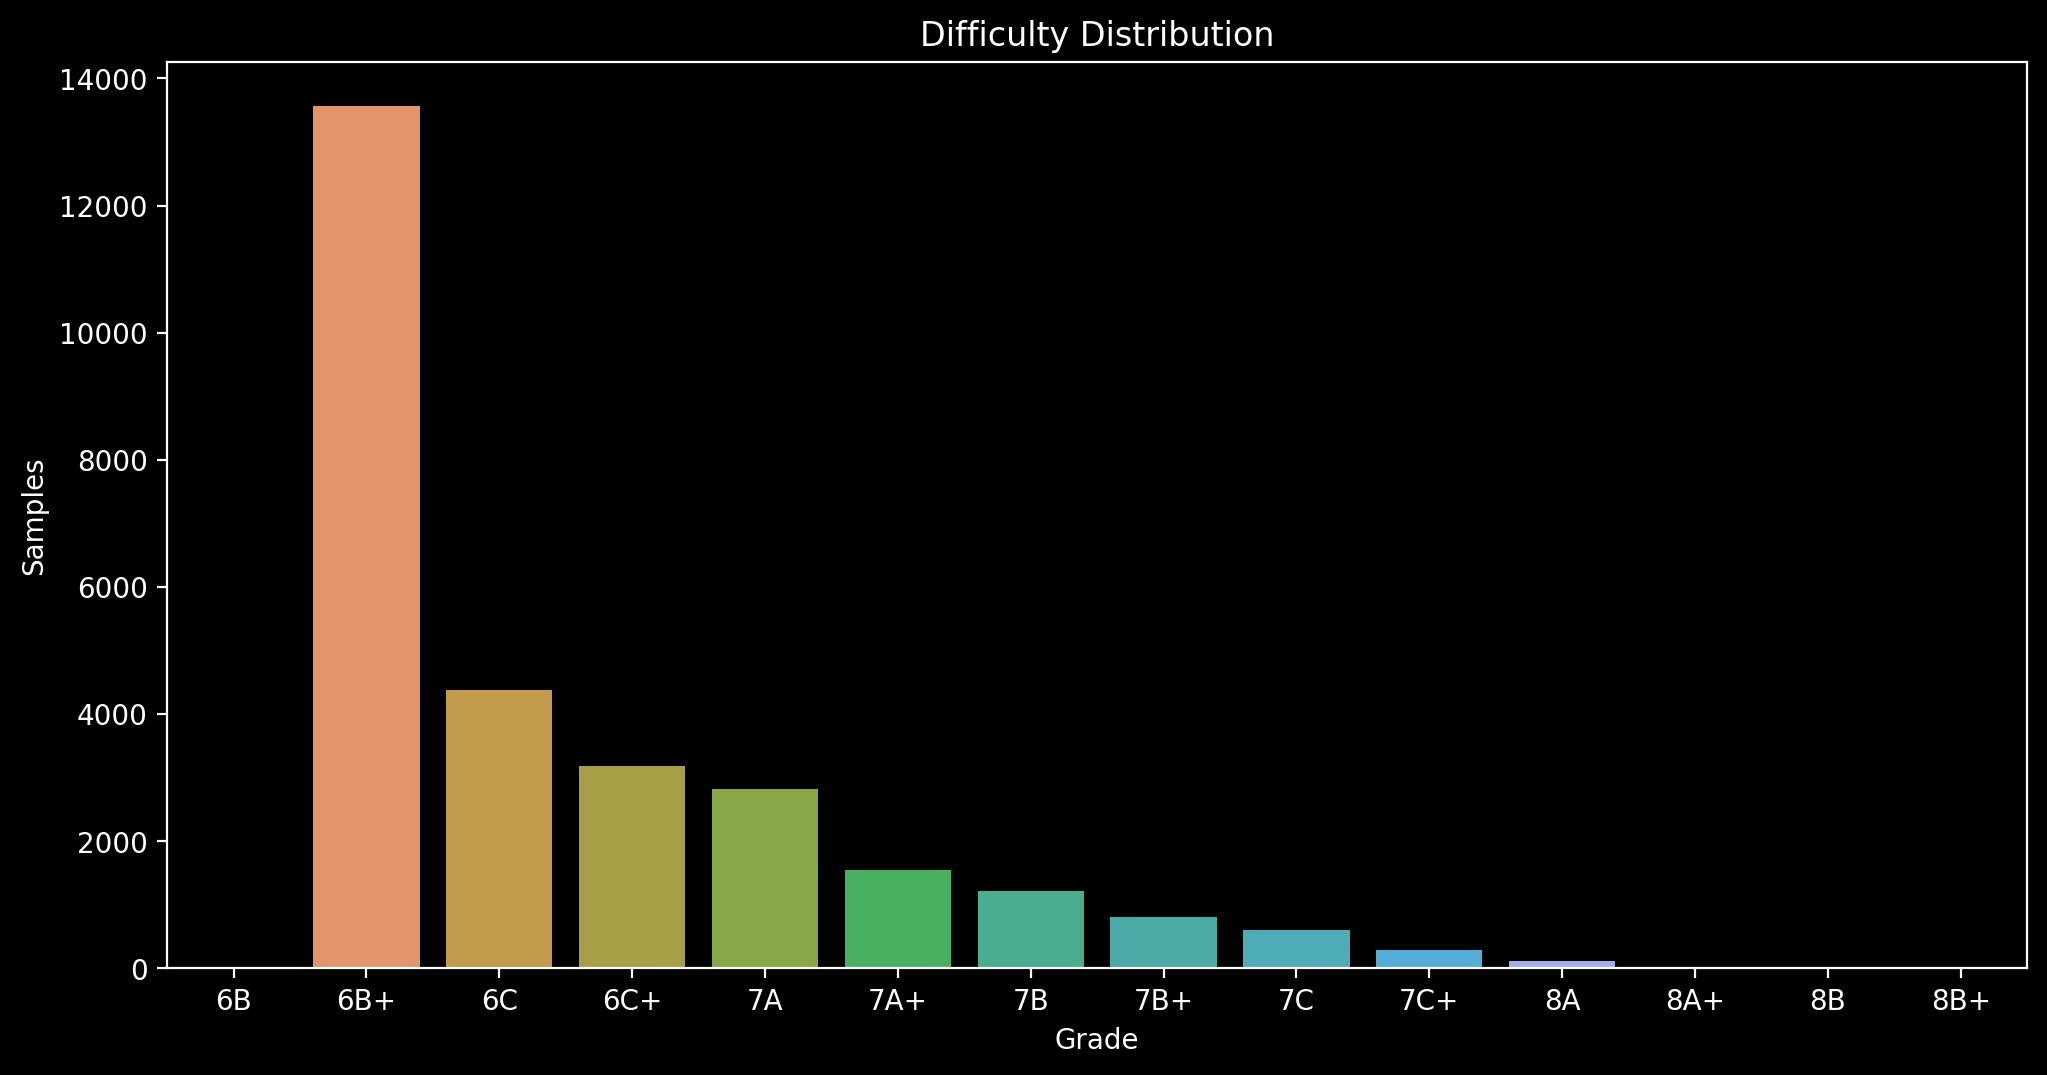

In [24]:
p = sns.countplot(
    data = processed_df,
    x = 'grade',
    order = np.sort( processed_df['grade'].unique() ),
)
p.set( title = 'Difficulty Distribution' )
p.set( ylabel = 'Samples' )
p.set( xlabel = 'Grade' )
plt.show()

In [25]:
display( processed_df )

,grade,is_benchmark,moves,features,features_flat,grade_index
0,6B+,True,"[E6, C5, E8, F11, C13, D15, D18]","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,6B+,True,"[F5, J8, I11, K11, G13, E15, E18]","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1
2,6B+,False,"[F5, J5, F9, C10, G13, E15, I18]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",1
3,7A,True,"[B10, E6, E8, E12, E16, G4, I18, J5]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",4
4,7A,False,"[C5, D7, A9, F11, F13, I14, E16, D18]","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
...,...,...,...,...,...,...
28563,6C+,False,"[F5, J2, C6, H10, K8, G13, I14, K12, E15, G18,...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...",3
28564,6B+,False,"[G6, I6, H8, G4, E10, G13, E15, E18]","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1
28565,6B+,False,"[F5, E10, H8, G13, H16, E16, D18]","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
28566,6B+,False,"[F5, G2, G9, C10, E12, A14, E16, B18]","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [26]:
# for grade_index in range( 1, 14 ):
#     # Compute the correlation matrix
#     corr = pd.DataFrame( np.vstack( ( 
#         processed_df['features_flat'][processed_df['grade_index'] == grade_index].values
#     ) ) ).corr()
    
#     corr = corr.dropna( axis = 0, how = 'all' )
#     corr = corr.dropna( axis = 1, how = 'all' )

#     # Generate a mask for the upper triangle
#     mask = np.triu( np.ones_like( corr, dtype = bool ) )

#     # Set up the matplotlib figure
#     f, ax = plt.subplots( figsize = ( 11, 9 ) )

#     # Generate a custom diverging colormap
#     cmap = sns.diverging_palette( 230, 20, as_cmap = True )

#     # Draw the heatmap with the mask and correct aspect ratio
#     sns.heatmap( corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#                 square=True, linewidths=.5, cbar_kws={"shrink": .5})
#     plt.plot()

In [27]:
totals = np.zeros( ( 18, 11 ) )

for i, row in processed_df.iterrows():
    totals += row['features']

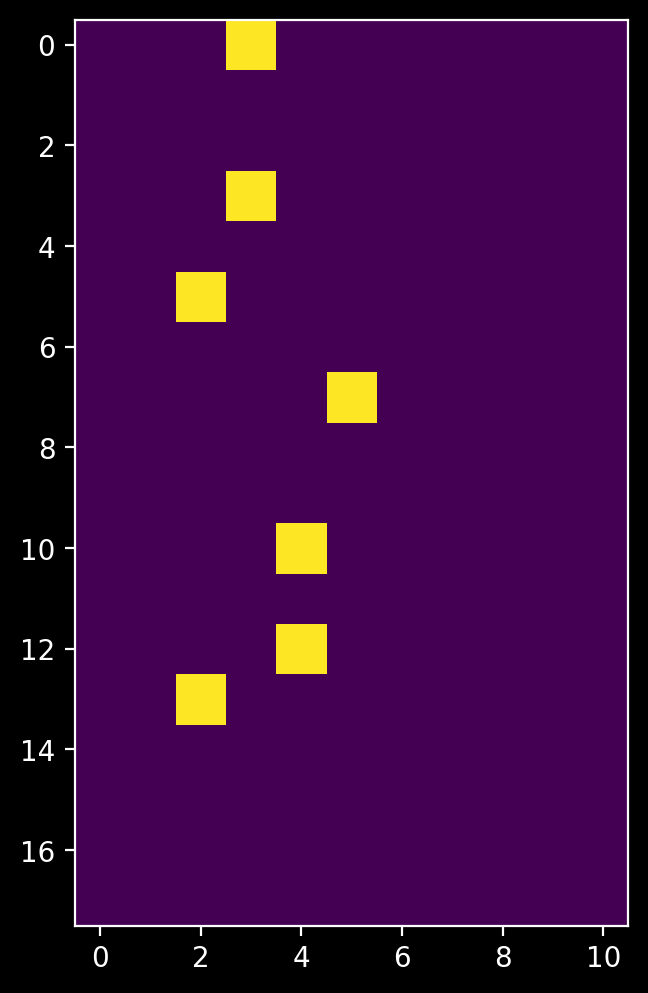

In [37]:
plt.imshow( processed_df['features'].iloc[0] )

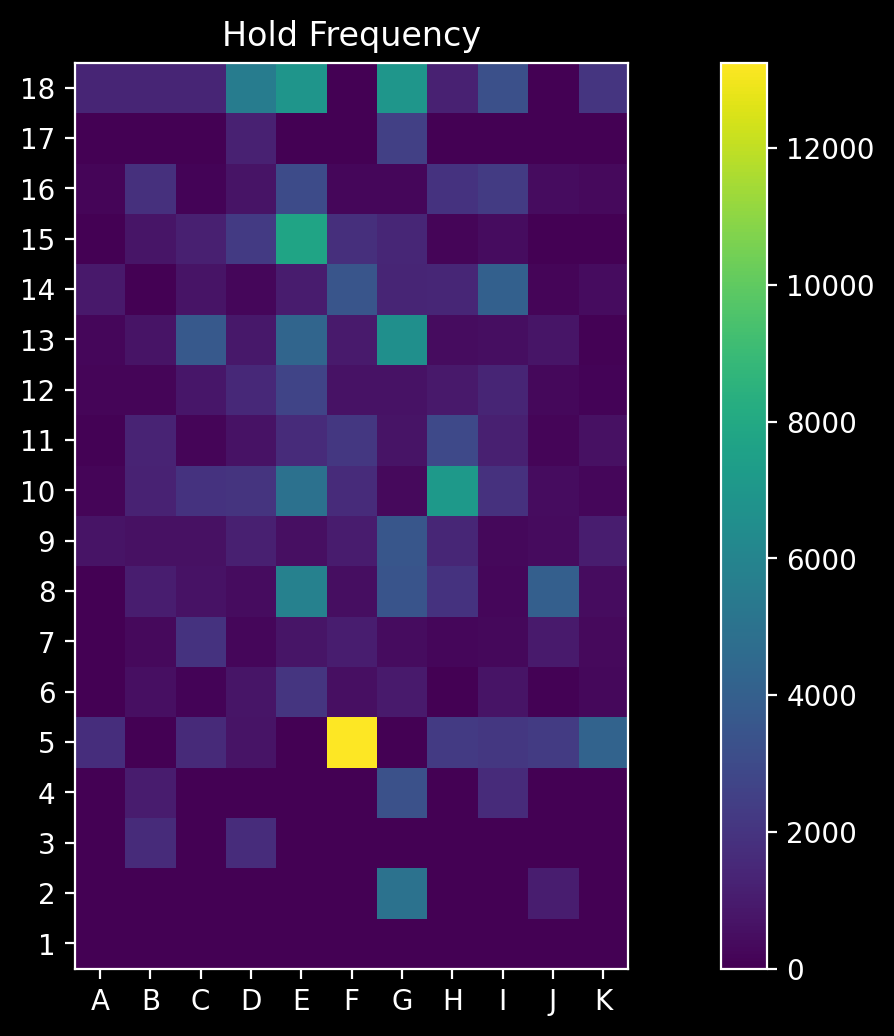

In [28]:
plt.imshow( totals )
plt.title( 'Hold Frequency' )
plt.yticks( range( 18 ), range( 18, 0, -1 )  )
plt.xticks( range( 11 ), [ c.upper() for c in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', ] ] )
plt.colorbar()
plt.show()

In [106]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [30]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE( n_components = 2 )

In [32]:
X = np.array( processed_df['features'].tolist() ).reshape( -1, 18 * 11 )
y = np.array( processed_df['grade_index'].tolist() )

In [33]:
dr = tsne.fit_transform( X )

In [34]:
X.shape, y.shape, dr.shape

((28568, 198), (28568,), (28568, 2))

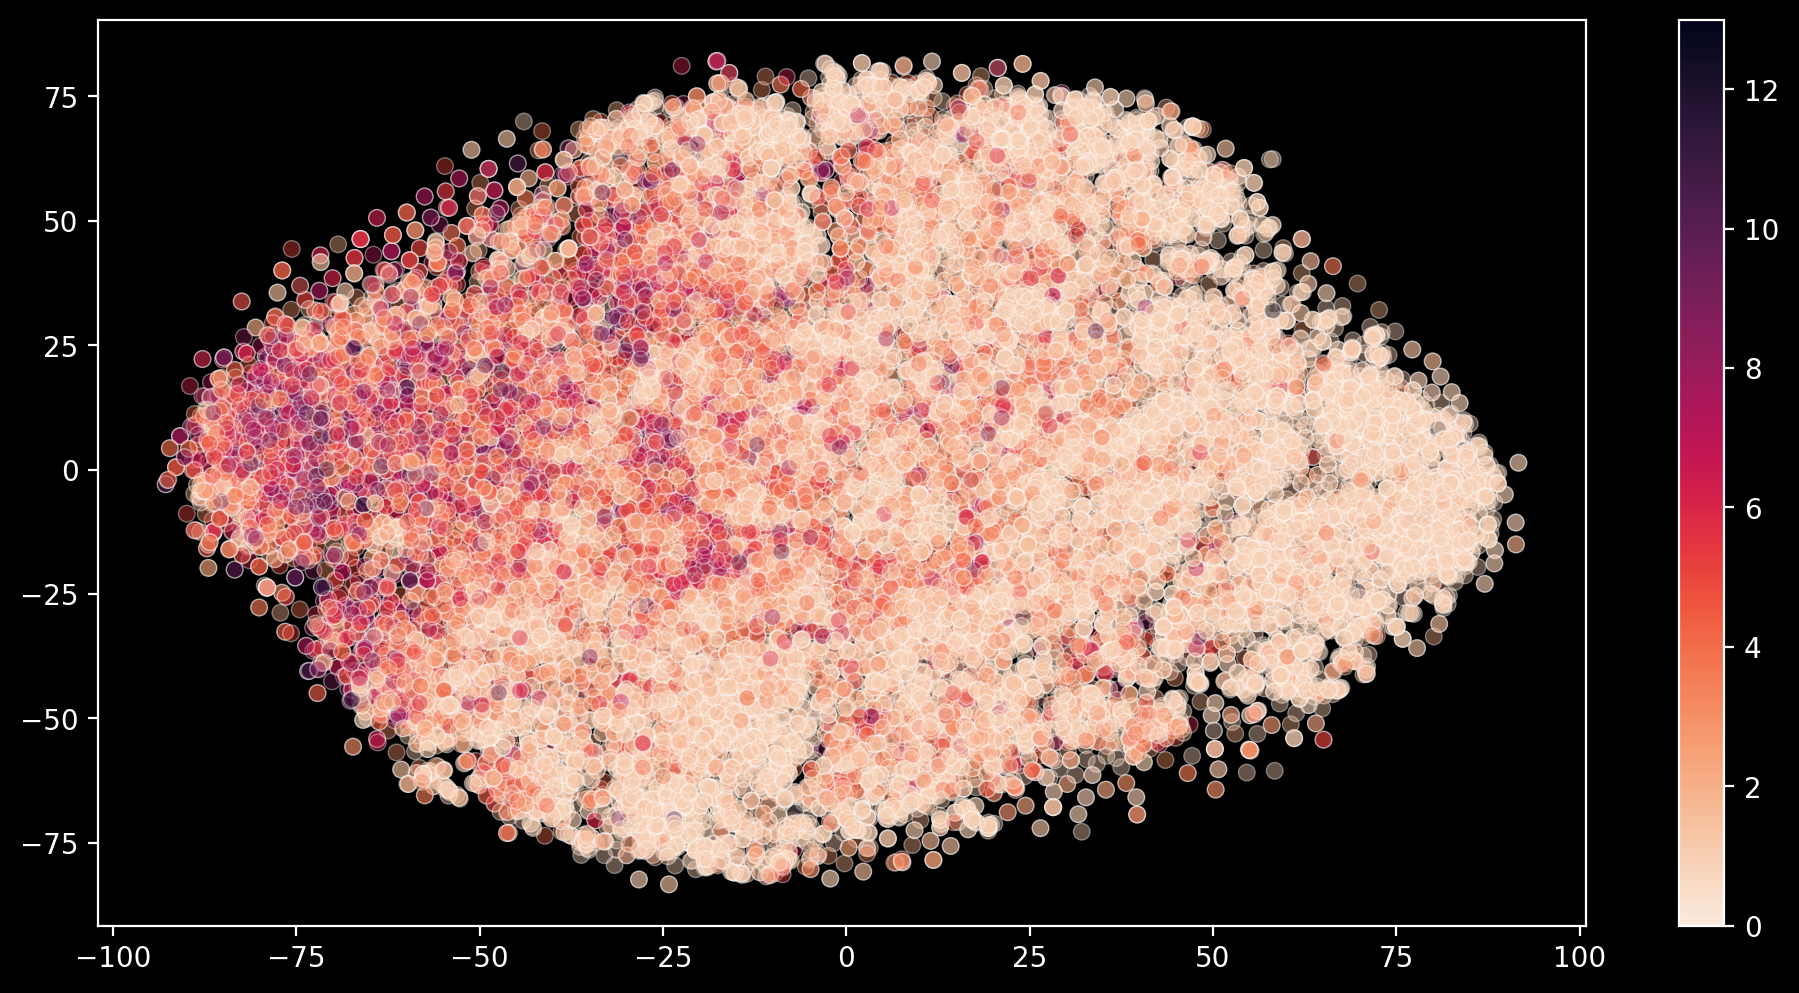

In [35]:
p = sns.scatterplot(
    x = dr[:,0],
    y = dr[:,1],
    hue = y,
    alpha = 0.4,
    palette = 'rocket_r'
)
norm = plt.Normalize(np.min( y ), np.max( y ))
sm = plt.cm.ScalarMappable(cmap= 'rocket_r', norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
p.get_legend().remove()
p.figure.colorbar(sm)

plt.show()
plt.show()

In [81]:
X_train = np.array( processed_df[processed_df['is_benchmark'] == False]['features'].tolist() ).reshape( -1, 18 * 11 )
X_test = np.array( processed_df[processed_df['is_benchmark'] == True]['features'].tolist() ).reshape( -1, 18 * 11 )

y_train = np.array( processed_df[processed_df['is_benchmark'] == False]['grade_index'].tolist() )
y_test = np.array( processed_df[processed_df['is_benchmark'] == True]['grade_index'].tolist() )

In [82]:
X = np.array( processed_df['features'].tolist() ).reshape( -1, 18 * 11 )
y = np.array( processed_df['grade_index'].tolist() )

In [83]:
total = 0

print( sum( [ 1 if x > 0 else 0 for x in np.sum( X, axis = 0 ) ] ) )
print( X.shape )

141
(28568, 198)


In [84]:
transform = PCA( n_components = 0.99999 )

In [107]:
# lr = Ridge( alpha = 1 )
# lr = LinearRegression()
lr = XGBRegressor()
lr.fit( transform.fit_transform( X_train ), y_train )

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [108]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [109]:
predictions = lr.predict( transform.transform( X_test ) )
train_predictions = lr.predict( transform.transform( X_train ) )

print( 'Train Evaluation' )
print( mae( y_train, train_predictions ) )
print( mse( y_train, train_predictions ) ** ( 1 / 2 ) )
print()

print( 'Test Evaluation' )
print( mae( y_test, predictions ) )
print( mse( y_test, predictions ) ** ( 1 / 2 ) )

Train Evaluation
0.505536961283173
0.696000276027369

Test Evaluation
1.098219751108677
1.4193260126689458


In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [111]:
predictions = np.round( predictions )

print( classification_report( y_test, predictions, labels = range( 14 ), target_names = [ key for key in grades.keys() ][1:] ) )

              precision    recall  f1-score   support

          6B       0.00      0.00      0.00         0
         6B+       0.78      0.42      0.54        77
          6C       0.27      0.45      0.34        65
         6C+       0.23      0.36      0.28        59
          7A       0.27      0.29      0.28        79
         7A+       0.25      0.24      0.25        82
          7B       0.23      0.20      0.21        60
         7B+       0.27      0.38      0.31        34
          7C       0.42      0.23      0.30        47
         7C+       0.30      0.12      0.17        26
          8A       0.50      0.08      0.13        13
         8A+       0.00      0.00      0.00         2
          8B       0.00      0.00      0.00         1
         8B+       0.00      0.00      0.00         0

   micro avg       0.30      0.30      0.30       545
   macro avg       0.25      0.20      0.20       545
weighted avg       0.35      0.30      0.30       545



/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/ho

/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(75.06944444444443, 0.5, 'True Grade')

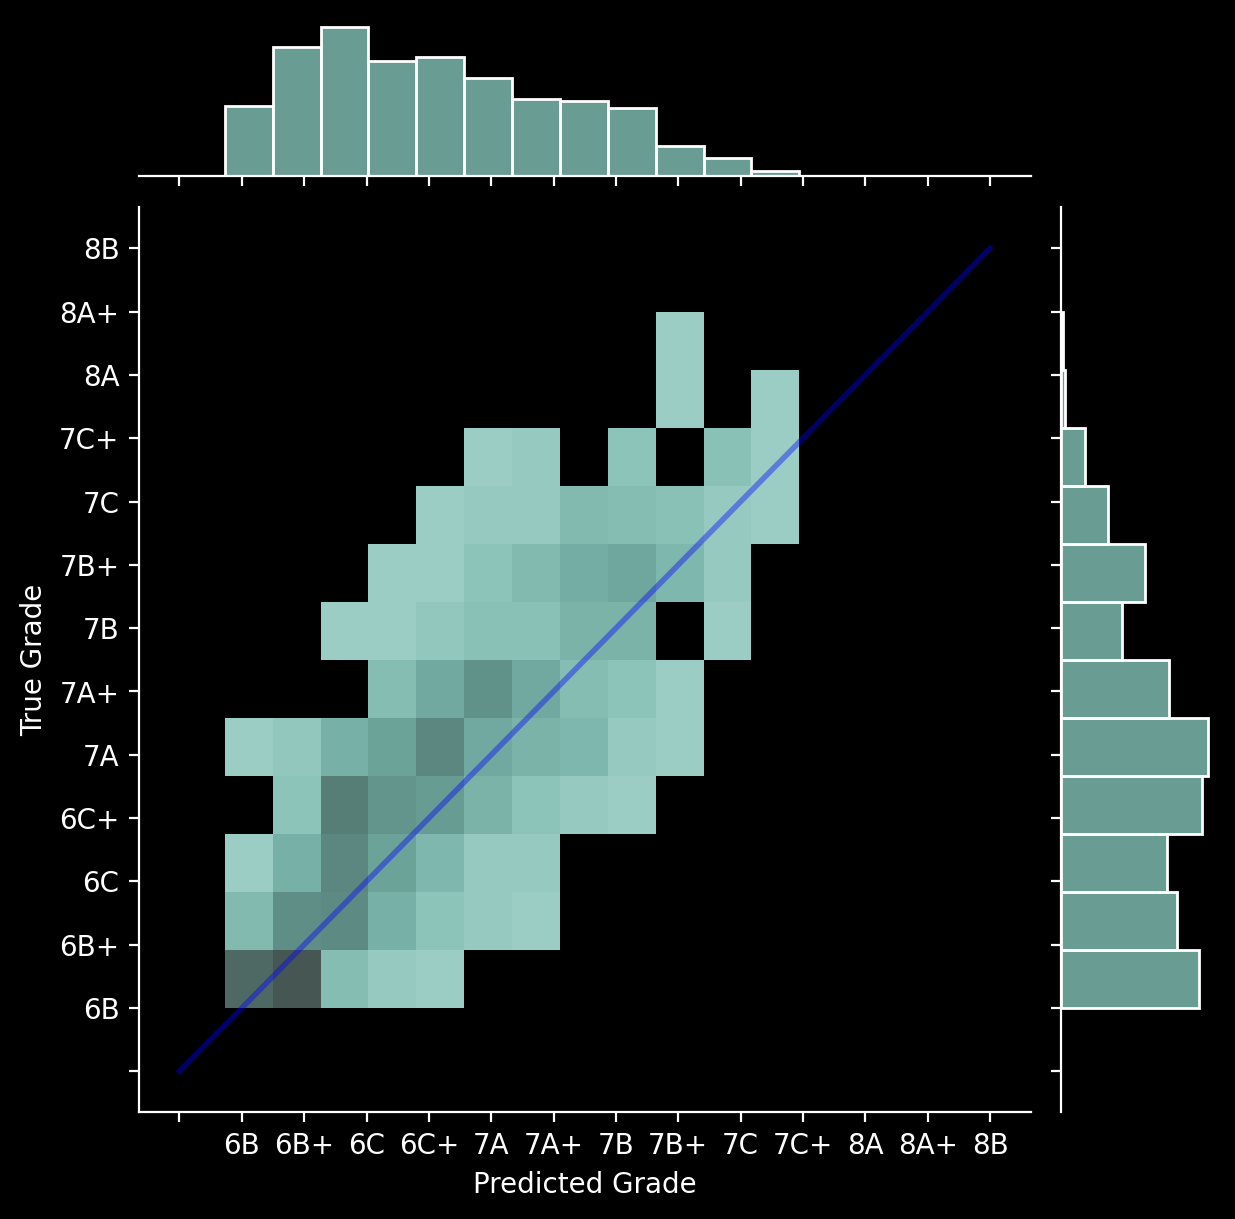

In [112]:
plot = sns.jointplot(
    lr.predict( transform.transform( X_test ) ),
    y_test,
    kind = 'hist',
)
plot.ax_joint.set_xticks( range( len( grades ) ), grades )
plot.ax_joint.set_yticks( range( len( grades ) ), grades )
plot.ax_joint.plot([0,13], [0, 13], 'b-', linewidth = 2, alpha = 0.4 )
plot.ax_joint.set_xlabel( 'Predicted Grade' )
plot.ax_joint.set_ylabel( 'True Grade' )

/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Grade')

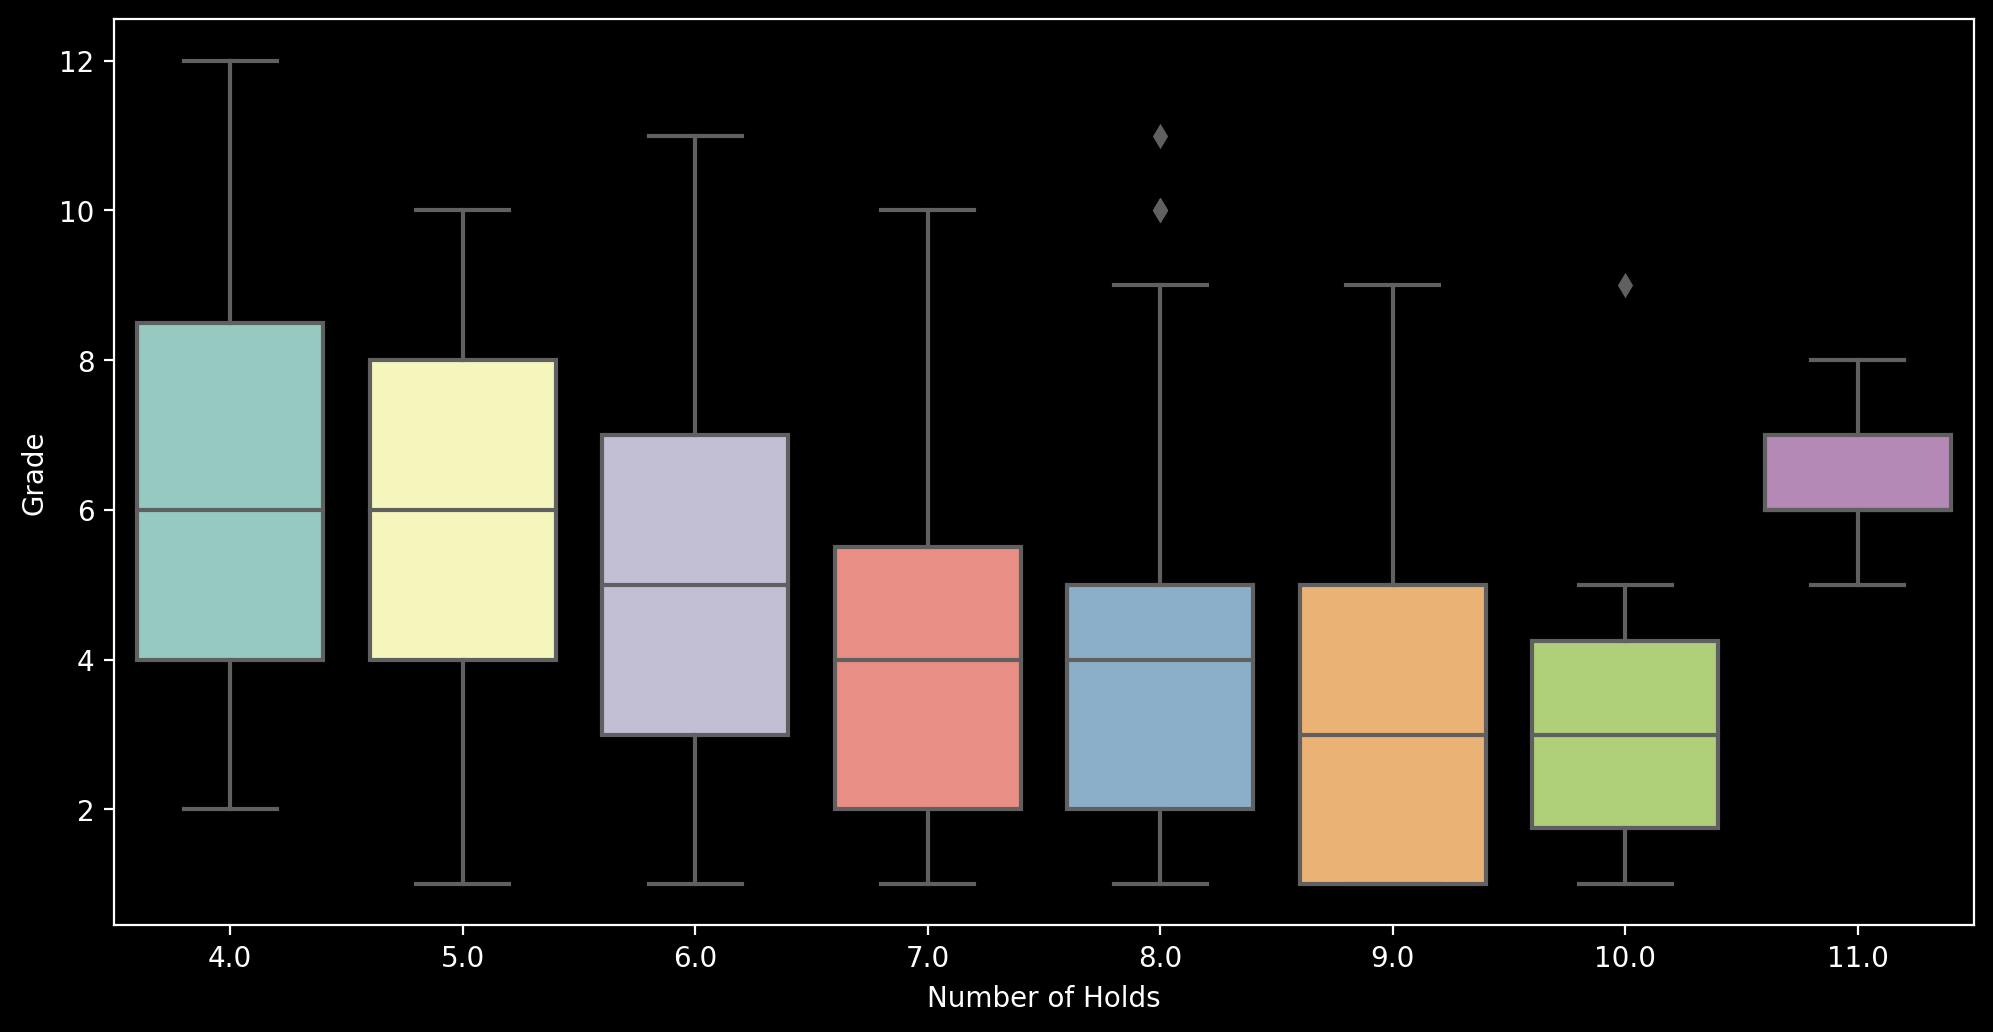

In [95]:
plot = sns.boxplot(
    np.sum( X_test, axis = 1 ),
    y_test,
)
plt.xlabel( 'Number of Holds' )
plt.ylabel( 'Grade' )

/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Grade')

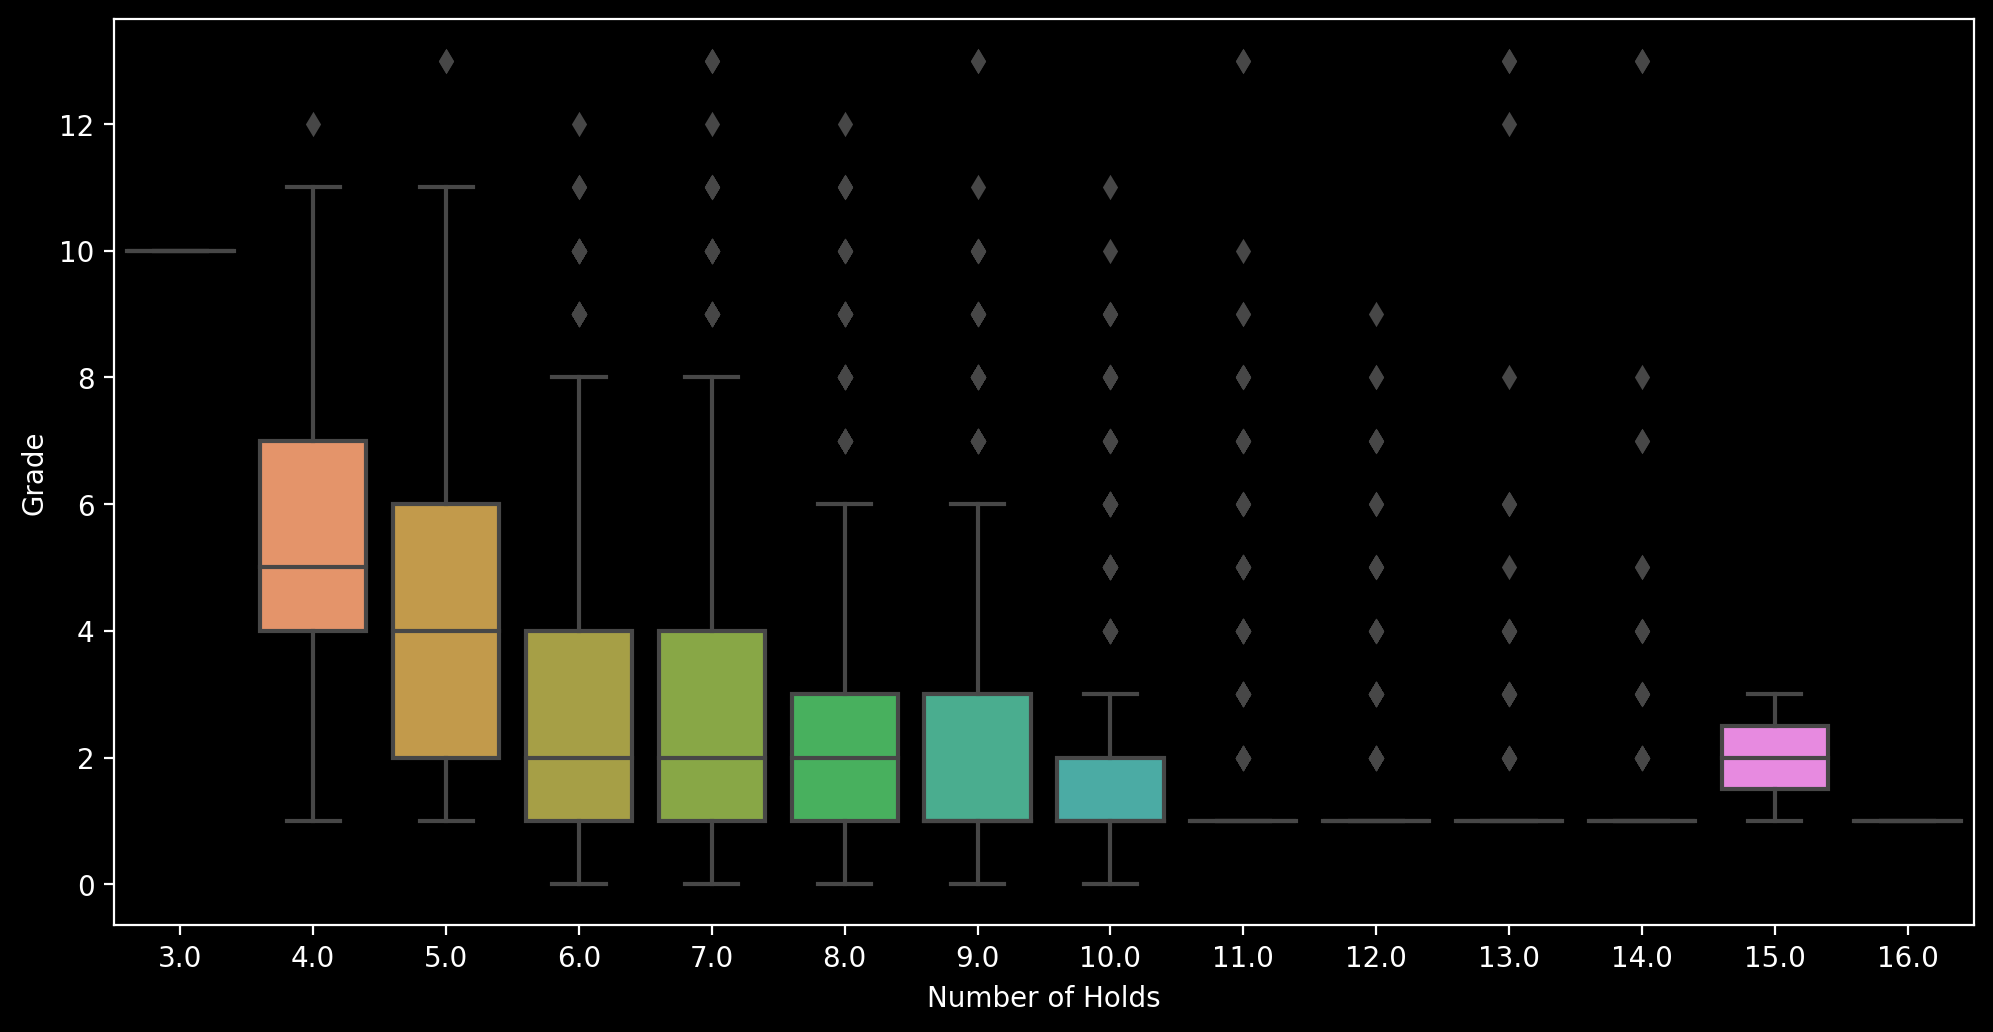

In [96]:
plot = sns.boxplot(
    np.sum( X, axis = 1 ),
    y,
)
plt.xlabel( 'Number of Holds' )
plt.ylabel( 'Grade' )

/home/mjr/.conda/envs/datasci-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Grade Error')

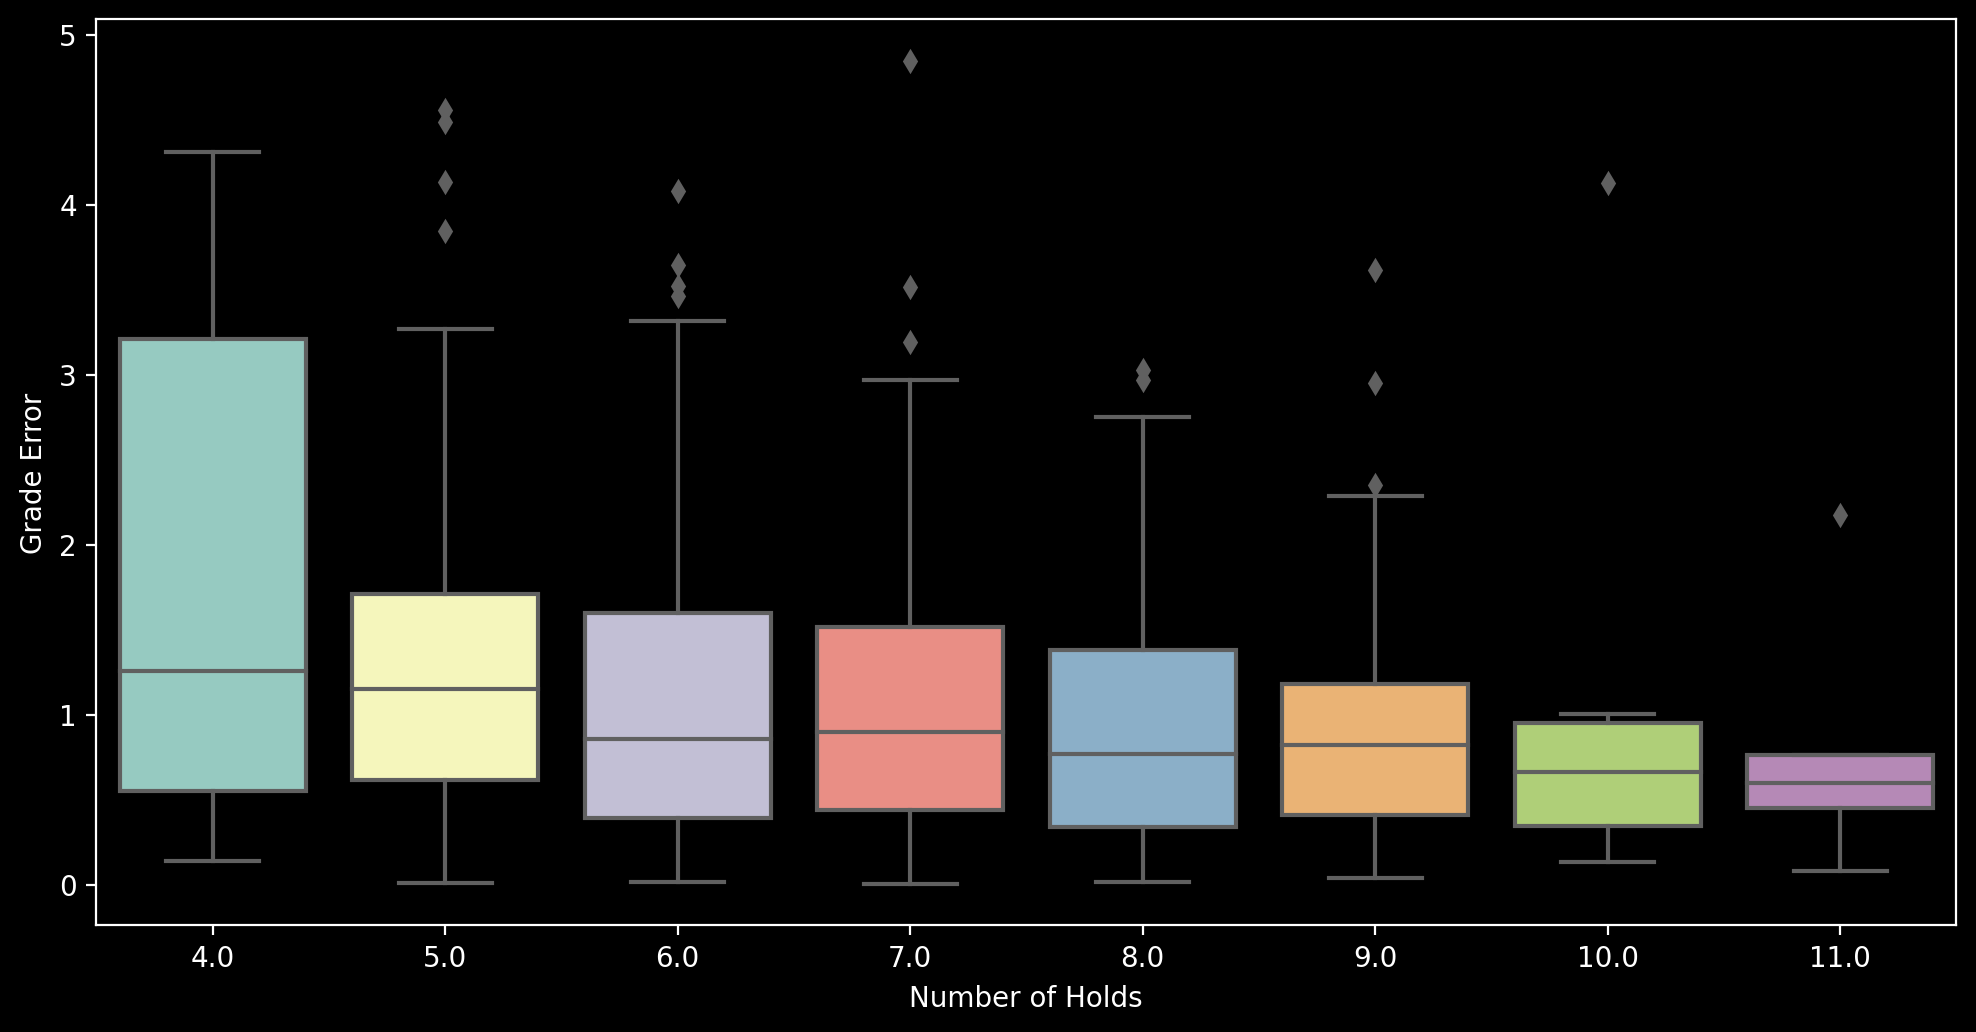

In [113]:
plot = sns.boxplot(
    np.sum( X_test, axis = 1 ),
    np.abs( y_test - lr.predict( transform.transform( X_test ) ) ),
)
plt.xlabel( 'Number of Holds' )
plt.ylabel( 'Grade Error' )

ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (15).

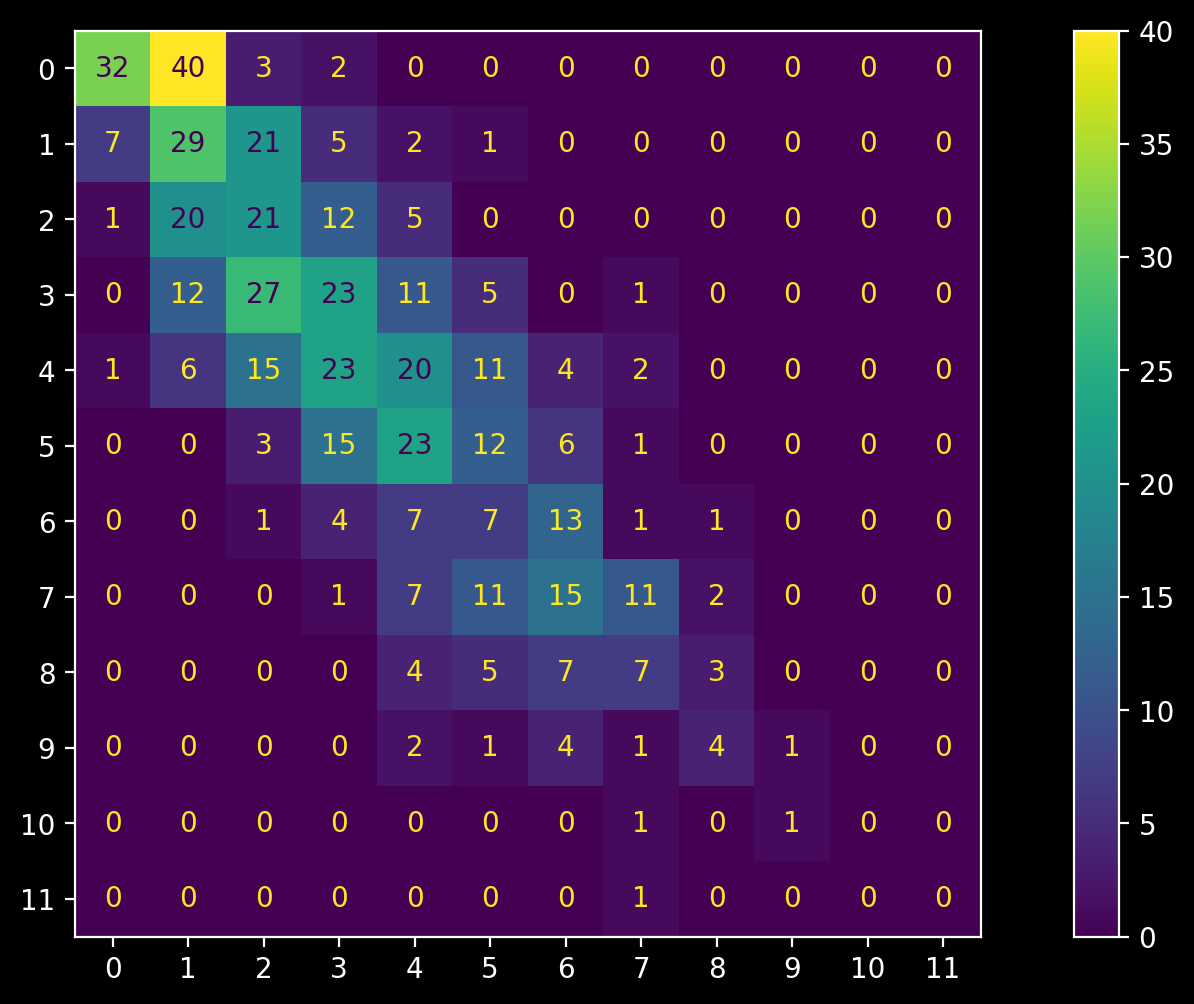

In [114]:
cm = confusion_matrix( y_test, predictions )
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = grades )
disp.plot()
plt.show()

In [101]:
print( lr.coef_.shape )
print( transform.components_.shape )

(140,)
(140, 198)


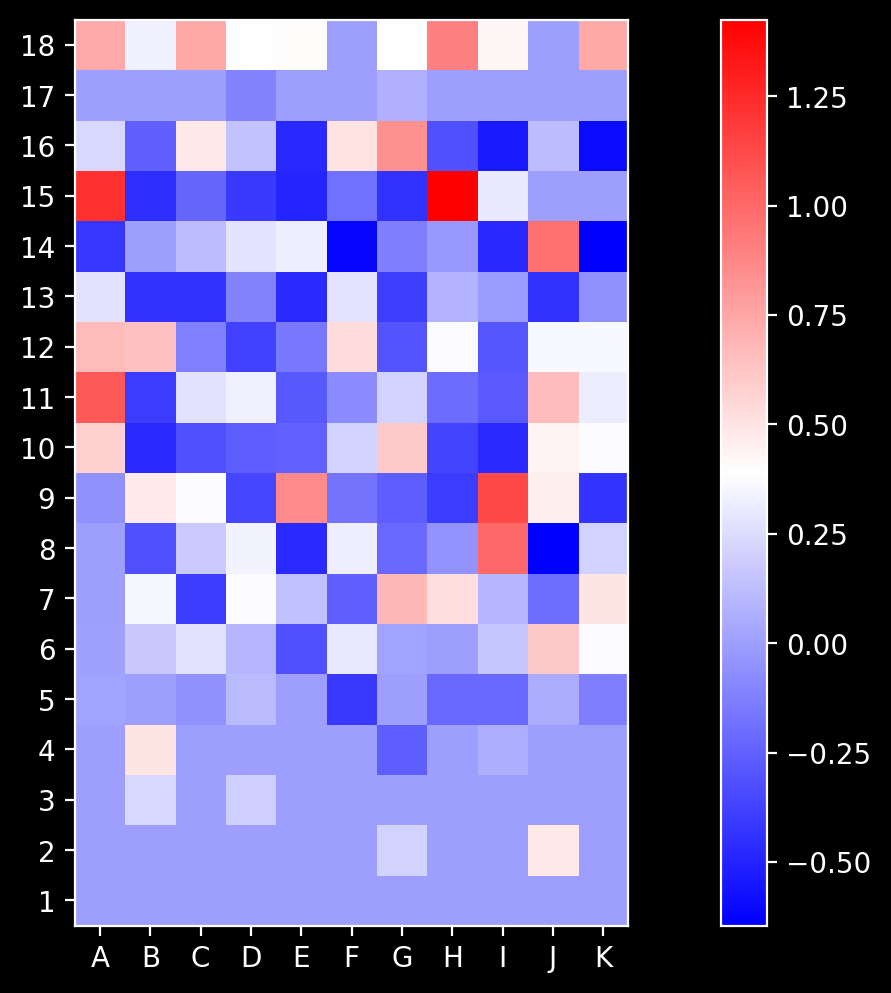

In [103]:
plt.imshow( ( np.dot(lr.coef_, transform.components_) + transform.mean_ ).reshape( 18, 11 ), cmap = 'bwr' )
plt.colorbar()
plt.yticks( range( 18 ), range( 18, 0, -1 )  )
plt.xticks( range( 11 ), [ c.upper() for c in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', ] ] )
plt.show()

In [ ]:
from matplotlib.colors import LogNorm

sns.heatmap( 
    np.cov( X.T ),
    norm = LogNorm(),
)

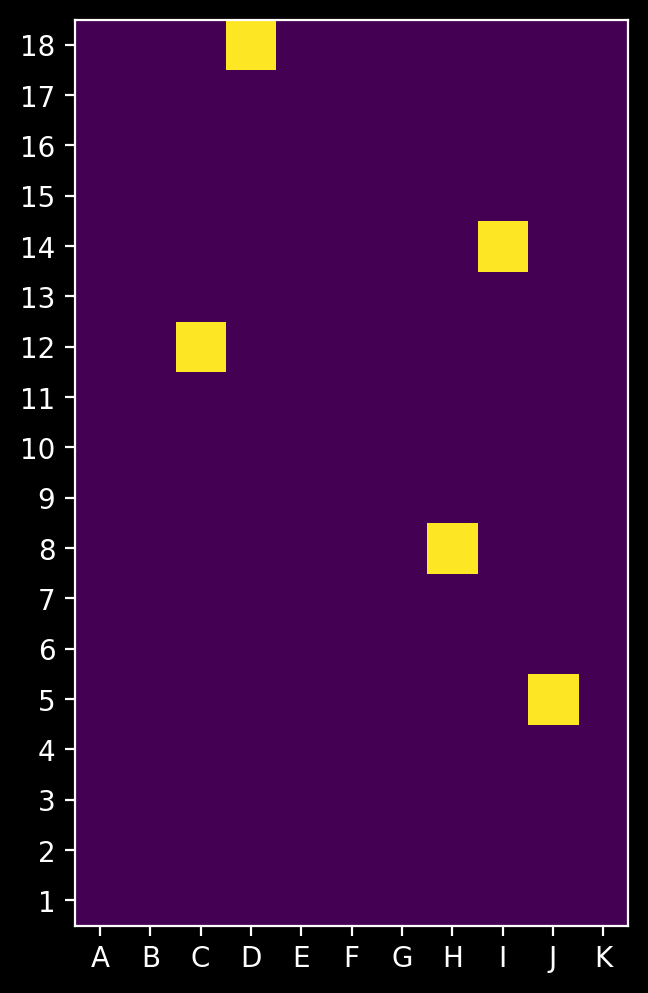

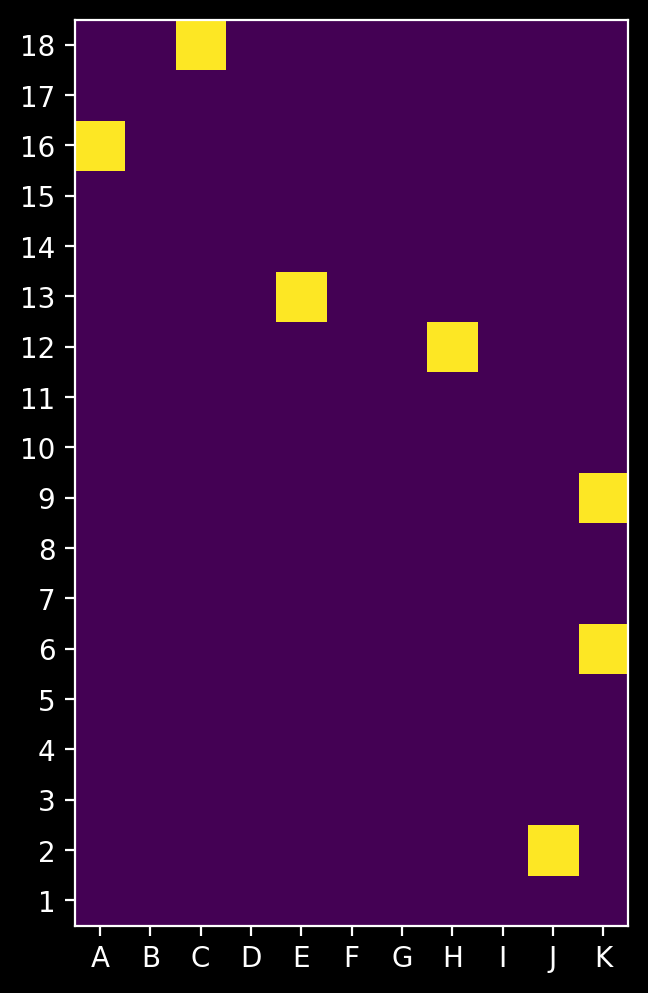

In [117]:
for climb in X_test[np.abs( y_test - predictions ) > 4]:
    plt.imshow( climb.reshape( 18, 11 ) )
    plt.yticks( range( 18 ), range( 18, 0, -1 )  )
    plt.xticks( range( 11 ), [ c.upper() for c in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', ] ] )
    plt.show()

In [100]:
# Add some engineered features:
# Number of holds
# Average distance between holds